In [2]:
import csv
import pandas as pd
from load_clean_review import load_and_clean_reviews

PATH = "data/Digital_Ebook.tsv"

df = load_and_clean_reviews(PATH)

In [3]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,33605939,RGYFDX8QXKEIR,B007KO2MLO,328837464,Big Maria,Digital_Ebook_Purchase,4,0,0,False,False,Quirky,Elmore Leonard meets the cast of Sierra Madre....,2013-09-09
1,US,34058393,R13CBGTMNV9R8Z,B005FLODDE,764276359,The Woman Who Wasn't There: The True Story of ...,Digital_Ebook_Purchase,4,1,2,False,True,The Woman Who Wasn't There,This book was very interesting. It is a true s...,2013-09-09
2,US,39601147,R7DRFHC0F71O0,B00EA3L35O,535606445,Mary had A Sleepy Sheep,Digital_Ebook_Purchase,5,0,0,False,False,This Sleepy Sheep rocks!,I had the opportunity to review Mary had a Sle...,2013-09-09
3,US,17351407,R27LUKEXU3KBXQ,B00BL3JV50,240053004,Starstruck,Digital_Ebook_Purchase,5,1,1,False,True,Steamy and suspenseful!!!!!,What a great read! I really couldn't put this...,2013-09-09
4,US,10463387,R1VXTPUYMNU687,B00CXU7U80,931529805,The Complete Conan Saga,Digital_Ebook_Purchase,5,1,2,False,False,Barbarians,Barbarians need love too ! Short stories work...,2013-09-09


In [4]:
min_date = df["review_date"].min()
max_date = df["review_date"].max()

print("Earliest review:", min_date)
print("Latest review:", max_date)



# Extract year and month as separate columns
df["year"] = df["review_date"].dt.year
df["month"] = df["review_date"].dt.month

# Group by year and collect unique months
months_per_year = df.groupby("year")["month"].unique()

print(months_per_year)

print(months_per_year.loc[2012.0])

Earliest review: 1999-08-28 00:00:00
Latest review: 2013-09-09 00:00:00
year
1999.0                                          [10.0, 8.0]
2000.0                            [9.0, 8.0, 6.0, 5.0, 2.0]
2001.0                [11.0, 10.0, 9.0, 7.0, 6.0, 4.0, 3.0]
2002.0                                      [5.0, 4.0, 2.0]
2003.0                                           [7.0, 2.0]
2004.0                [12.0, 11.0, 8.0, 6.0, 4.0, 2.0, 1.0]
2005.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 5.0, 4.0, 3....
2006.0      [12.0, 11.0, 9.0, 8.0, 7.0, 6.0, 5.0, 2.0, 1.0]
2007.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2008.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2009.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2010.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2011.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2012.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2013.0        [9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]
Name: month, dtype: obj

In [5]:

df_2012 = df[df["review_date"].dt.year == 2012].copy()

df_2012


df_2012["review_length"] = df_2012["review_body"].fillna("").str.split().str.len()
df_2012 = df_2012[df_2012["review_length"] > 0]

df_2012["length_bin"] = pd.qcut(
    df_2012["review_length"], q=3, labels=["short", "medium", "long"], duplicates="drop"
)

df_2012

target_n = 4000
labels = ["short", "medium", "long"]

per = target_n // len(labels)   # base quota per bucket (≈ 1333)
rem = target_n - per * len(labels)   # leftover rows to distribute


parts = []
for i, label in enumerate(labels):
    want = per + (1 if i < rem else 0)  # bucket-specific quota
    have = (df_2012["length_bin"] == label).sum()  # how many rows exist in that bucket
    take = min(want, have)  # don’t over-ask if bucket is too small
    if take > 0:
        parts.append(
            df_2012[df_2012["length_bin"] == label].sample(n=take, random_state=42)
        )

sampled_df = pd.concat(parts)

sampled_df

shuffled_df = (
    sampled_df
      .sample(frac=1, random_state=42)  
      .reset_index(drop=True)          
)

shuffled_df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,year,month,review_length,length_bin
0,US,10540020,R1834ROLJD53QO,B0066Q40L2,67860509,Out of Focus (An Adams Grove Novel Book 2),Digital_Ebook_Purchase,5,1,1,False,True,"Love,love, love it!","This book is wonderful! This author, Nancy Nag...",2012-11-05,2012.0,11.0,35,short
1,US,20924647,R1QUNUXOIESQM3,B005DXOMXK,568536292,Climate Coup: Global Warming's Invasion of Our...,Digital_Ebook_Purchase,2,1,28,False,False,Man proposes - Nature disposes,"In reading this book, I was constantly reminde...",2012-02-20,2012.0,2.0,140,long
2,US,48508291,RZDWHD88TLRTP,B0052L23T8,684133513,Honeybee: Lessons from an Accidental Beekeeper,Digital_Ebook_Purchase,5,0,0,False,True,Honeybee: Lessons from an Accidental Beekeeper,It was very interesting. Even if you don't int...,2012-10-09,2012.0,10.0,33,short
3,US,45470054,R28VDVEOBZNDFE,B006RPASJK,347196942,Border Crossings: A Catherine James Thriller,Digital_Ebook_Purchase,5,36,37,False,False,Is there a part two???,I thoroughly enjoyed this book. From the first...,2012-01-01,2012.0,1.0,103,long
4,US,16858552,R2R3TMQKZ6VLXA,B006B0CGTQ,172841142,Discovering God: Exploring the Possibilities,Digital_Ebook_Purchase,5,6,7,False,True,For the Seeker and Believer,"\""Discovering God\"" is a great book for the se...",2012-02-03,2012.0,2.0,138,long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,US,52312104,R23R6UONWCRK92,B00750FQSY,650621292,Mills & Boon : All Over You (Secret Lives of D...,Digital_Ebook_Purchase,4,0,0,False,False,Happy Sigh!,There are few Harlequin books that successfull...,2012-09-24,2012.0,9.0,29,short
3996,US,15317220,R3R38011P903JM,B00ANDLC6K,846827725,The Coincidence of Callie and Kayden (The Coin...,Digital_Ebook_Purchase,4,0,1,False,True,This book is amazing,I honestly can't wait for the sequel! Hanging ...,2012-12-30,2012.0,12.0,31,short
3997,US,12466879,R23Y1XR9VW98QQ,B008ZSS9MA,86124043,The Book of Mormon (Illustrated),Digital_Ebook_Purchase,5,1,2,False,True,The Book of Mormon,"The book is wonderful, exclent,I know it is tr...",2012-11-05,2012.0,11.0,21,short
3998,US,15575874,R2L4QFLHYS3F67,B008TSC33W,226754526,Beyond Outrage: Expanded Edition: What has gon...,Digital_Ebook_Purchase,5,2,4,False,True,"entertaining,informative and empowering",As usual Robert Reich says it like it is at le...,2012-10-13,2012.0,10.0,119,long


In [7]:
# Recreate qcut but keep the Interval objects
bins = pd.qcut(df_2012["review_length"], q=3, duplicates="drop")

# Look at unique intervals
print(bins.cat.categories)

IntervalIndex([(0.999, 36.0], (36.0, 84.0], (84.0, 8706.0]], dtype='interval[float64, right]')


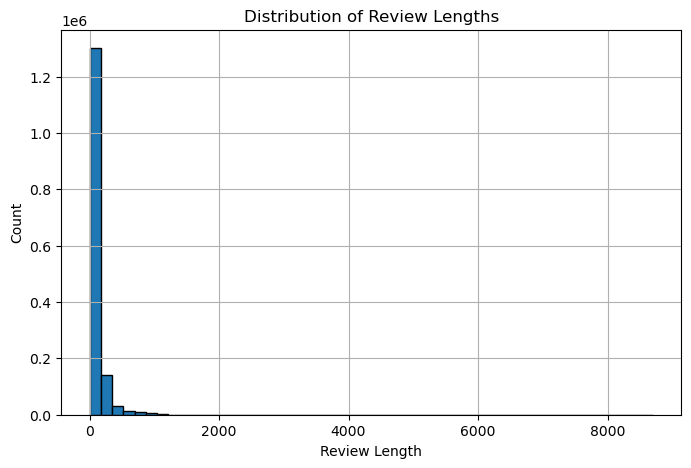

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df_2012["review_length"].hist(bins=50, edgecolor="black")
plt.xlabel("Review Length")
plt.ylabel("Count")
plt.title("Distribution of Review Lengths")
plt.show()

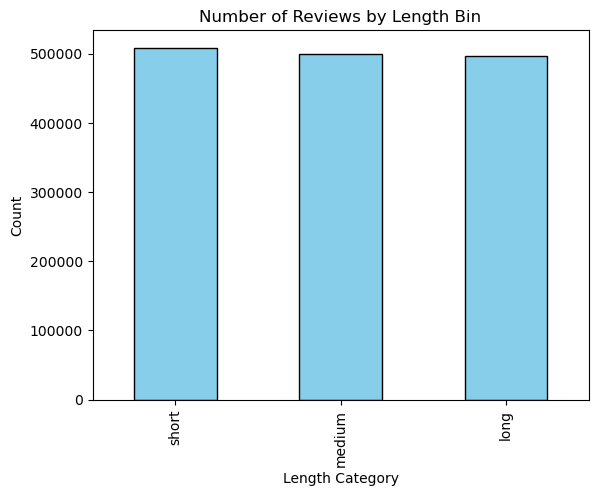

In [9]:
df_2012["length_bin"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Length Category")
plt.ylabel("Count")
plt.title("Number of Reviews by Length Bin")
plt.show()

In [10]:
from month_bin_shuffle import add_length_info, stratified_sample_by_month_and_bin

df_2012 = df[df["review_date"].dt.year == 2012].copy()

df_2012 = add_length_info(df_2012)
df_2012 = stratified_sample_by_month_and_bin(df_2012, target_n=4000)

df_2012


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,year,month,review_length,length_bin
0,US,50427612,R3GA6A8YZ65WFO,B005GG0LS4,403975292,By a Thread (Elemental Assassin Series Book 6),Digital_Ebook_Purchase,5,1,2,False,False,This series always hits the right notes!,I was a bit worried about how things would tra...,2012-02-29,2012.0,2012-02,403,long
1,US,26026423,RBHGFF6AEOYIZ,B007J6DMZS,844627777,Sucka for love,Digital_Ebook_Purchase,5,0,0,False,True,"Bravo, bravo",I love this book I am very satisfied. Tommy wa...,2012-11-09,2012.0,2012-11,73,medium
2,US,23330483,R2GC9TPISXNQC0,B006OFWS3W,709116828,A WOMAN WITHOUT A MAN,Digital_Ebook_Purchase,5,1,1,False,False,The Purpose Of Life Is To Surprise Us,"Equal to the \""Surprise\"" warning in the title...",2012-02-28,2012.0,2012-02,215,long
3,US,23168427,RAPVGS1HQ66UP,B006NST1Q2,666509018,Embrace,Digital_Ebook_Purchase,5,2,2,False,False,Great,From The Book Lover's Report:[...]<br /><br />...,2012-12-15,2012.0,2012-12,705,extra_long
4,US,47736692,R3MS5UV4ASY0ED,B0094GZIIU,775169897,A Tale of Two Governments,Digital_Ebook_Purchase,5,0,0,False,False,A Tale of Two Governments,"A Tale of Two Governments.<br /><br />In \""A T...",2012-09-17,2012.0,2012-09,979,extra_long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,US,51002365,RPRIB1SXAH6OD,B0051UT7VW,273864806,Doctor Who: I Am a Dalek (Doctor Who: Quick Re...,Digital_Ebook_Purchase,3,0,1,False,True,"It was okay, but don't expect too much","This is a REALLY fast, light read that any fan...",2012-04-16,2012.0,2012-04,152,medium
3996,US,13212787,R3S2K6FJQ7LUGA,B00736E83E,372817751,Destiny of The Wulf: (The Aduramis Chronicles ...,Digital_Ebook_Purchase,4,9,11,False,False,Brilliant!,Price i paid for this ebook: £ARC Price i woul...,2012-04-15,2012.0,2012-04,990,extra_long
3997,US,30127719,R2YXB49EHK4N63,B004HO5VQI,753013991,No Shelter - Holly Lin #1 (Holly Lin Series),Digital_Ebook_Purchase,2,11,23,False,True,Predictable and blah,I'm going to start this review with a rant tha...,2012-03-12,2012.0,2012-03,210,long
3998,US,52723213,R1NVCRZBYMOO4I,B005KLT3VQ,905632408,Seeds of Discovery (Dusk Gate Chronicles Book 1),Digital_Ebook_Purchase,4,0,0,False,True,Suprisingly Good Read,I picked this up for free as it sounded intere...,2012-11-29,2012.0,2012-11,341,long


In [11]:
LENGTH_BINS = [0, 50, 200, 500, float("inf")]
LENGTH_LABELS = ["short", "medium", "long", "extra_long"]
# --- Check bin ranges ---
for label, (low, high) in zip(LENGTH_LABELS, zip(LENGTH_BINS[:-1], LENGTH_BINS[1:])):
    upper = int(high) if high != float("inf") else "∞"
    print(f"{label:>10}: {low+1} – {upper} words")

# --- Count per (month × length_bin) ---
counts = df_2012.groupby(["month", "length_bin"]).size().unstack(fill_value=0)

print("\nCounts per (month × length_bin):")
print(counts)

# optional: quick totals per bin
print("\nTotals per bin:")
print(counts.sum(axis=0))

# optional: quick totals per month
print("\nTotals per month:")
print(counts.sum(axis=1))

     short: 1 – 50 words
    medium: 51 – 200 words
      long: 201 – 500 words
extra_long: 501 – ∞ words

Counts per (month × length_bin):
length_bin  short  medium  long  extra_long
month                                      
2012-01        84      84    84          84
2012-02        84      84    84          84
2012-03        84      84    84          84
2012-04        84      84    84          84
2012-05        83      83    83          83
2012-06        83      83    83          83
2012-07        83      83    83          83
2012-08        83      83    83          83
2012-09        83      83    83          83
2012-10        83      83    83          83
2012-11        83      83    83          83
2012-12        83      83    83          83

Totals per bin:
length_bin
short         1000
medium        1000
long          1000
extra_long    1000
dtype: int64

Totals per month:
month
2012-01    336
2012-02    336
2012-03    336
2012-04    336
2012-05    332
2012-06    332
2012-07    3

/var/folders/zm/pz0q6_fn2zv0lr2bzbh6_8mc0000gn/T/ipykernel_4149/1777719214.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df_2012.groupby(["month", "length_bin"]).size().unstack(fill_value=0)


In [13]:
df_2012.to_csv("ebook_2012.csv", index=False)